## Importing Libraries

In [1]:
!pip install --upgrade --no-cache-dir scikit-learn==1.4.2 imbalanced-learn==0.12.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 200.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 254.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score,accuracy_score

## Data Loading

In [3]:
data = pd.read_csv('/kaggle/input/genome-dataset/final_dataset.csv', on_bad_lines='skip')
print("Dataset successfully loaded")

Dataset successfully loaded


## Exploratory Data Analysis

In [4]:
#Shape of data

data_shape = data.shape
print(f'Shape of data : {data_shape}')

Shape of data : (62730, 28)


In [5]:
#Identifying column types

print(f'Columns of the dataset: {data.columns}')

Columns of the dataset: Index(['protein_id', 'Length', 'Molecular_Weight', 'Aromaticity',
       'Instability_Index', 'Isoelectric_Point', 'GRAVY', 'AA_A', 'AA_C',
       'AA_D', 'AA_E', 'AA_F', 'AA_G', 'AA_H', 'AA_I', 'AA_K', 'AA_L', 'AA_M',
       'AA_N', 'AA_P', 'AA_Q', 'AA_R', 'AA_S', 'AA_T', 'AA_V', 'AA_W', 'AA_Y',
       'is_enzyme'],
      dtype='object')


In [6]:
#Top rows of the data

data.head(10)

,protein_id,Length,Molecular_Weight,Aromaticity,Instability_Index,Isoelectric_Point,GRAVY,AA_A,AA_C,AA_D,...,AA_N,AA_P,AA_Q,AA_R,AA_S,AA_T,AA_V,AA_W,AA_Y,is_enzyme
0,Q0E1R9,470,52366.4198,0.076596,48.384681,5.605541,-0.093830,0.097872,0.017021,0.063830,...,0.042553,0.031915,0.034043,0.048936,0.102128,0.046809,0.055319,0.010638,0.023404,0
1,A0A0P0VVV1,222,23833.4626,0.049550,40.306757,6.361556,0.167117,0.135135,0.018018,0.045045,...,0.045045,0.076577,0.045045,0.031532,0.076577,0.018018,0.103604,0.000000,0.022523,0
2,Q7EZ85,126,13237.0271,0.023810,115.626984,10.410629,-0.721429,0.126984,0.007937,0.023810,...,0.000000,0.246032,0.007937,0.087302,0.126984,0.079365,0.039683,0.000000,0.000000,0
3,Q10PL5,349,38799.3236,0.074499,40.241003,5.716377,-0.046705,0.063037,0.008596,0.060172,...,0.042980,0.068768,0.025788,0.048711,0.065903,0.037249,0.085960,0.002865,0.034384,1
4,Q6YWQ0,573,62728.5289,0.095986,44.531257,7.871606,-0.357243,0.078534,0.020942,0.069808,...,0.043630,0.095986,0.048866,0.050611,0.055846,0.057592,0.054101,0.006981,0.043630,0
5,Q0IZN1,490,52883.3856,0.102041,34.995735,7.160769,0.603265,0.095918,0.014286,0.016327,...,0.026531,0.036735,0.018367,0.036735,0.106122,0.057143,0.077551,0.018367,0.028571,0
6,Q5ZC63,629,68844.7178,0.090620,43.631638,8.548588,0.021622,0.076312,0.038156,0.030207,...,0.050874,0.044515,0.020668,0.052464,0.098569,0.049285,0.060413,0.009539,0.036566,1
7,A0A0P0XEB6,280,31300.5447,0.114286,43.378571,8.579404,0.003929,0.107143,0.017857,0.032143,...,0.028571,0.035714,0.025000,0.078571,0.082143,0.053571,0.082143,0.025000,0.035714,0
8,Q6ZDX1,279,29661.4638,0.043011,59.937634,9.177542,-0.824731,0.139785,0.021505,0.064516,...,0.007168,0.078853,0.014337,0.118280,0.107527,0.064516,0.053763,0.007168,0.017921,0
9,A0A8J8YML7,228,24491.5911,0.131579,21.835088,4.556634,-0.169298,0.149123,0.004386,0.092105,...,0.021930,0.017544,0.048246,0.035088,0.065789,0.065789,0.100877,0.030702,0.057018,0


In [7]:
#Dustribution of target

print(data['is_enzyme'].value_counts())

is_enzyme
0    48453
1    14277
Name: count, dtype: int64


In [8]:
#Information on data and column datatype

data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62730 entries, 0 to 62729
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   protein_id         62730 non-null  object 
 1   Length             62730 non-null  int64  
 2   Molecular_Weight   62730 non-null  float64
 3   Aromaticity        62730 non-null  float64
 4   Instability_Index  62730 non-null  float64
 5   Isoelectric_Point  62730 non-null  float64
 6   GRAVY              62730 non-null  float64
 7   AA_A               62730 non-null  float64
 8   AA_C               62730 non-null  float64
 9   AA_D               62730 non-null  float64
 10  AA_E               62730 non-null  float64
 11  AA_F               62730 non-null  float64
 12  AA_G               62730 non-null  float64
 13  AA_H               62730 non-null  float64
 14  AA_I               62730 non-null  float64
 15  AA_K               62730 non-null  float64
 16  AA_L               627

In [9]:
#Descriptive Statistics

data.describe()

,Length,Molecular_Weight,Aromaticity,Instability_Index,Isoelectric_Point,GRAVY,AA_A,AA_C,AA_D,AA_E,...,AA_N,AA_P,AA_Q,AA_R,AA_S,AA_T,AA_V,AA_W,AA_Y,is_enzyme
count,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,...,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000
mean,379.227037,41720.376398,0.074039,49.491278,7.630415,-0.239540,0.099311,0.020735,0.050885,0.056059,...,0.031549,0.060294,0.032281,0.070777,0.081242,0.047152,0.068874,0.013583,0.024660,0.227594
std,302.679229,33762.586809,0.030556,16.858201,2.056920,0.394800,0.041860,0.016395,0.021224,0.027027,...,0.018219,0.031961,0.018199,0.036510,0.032455,0.019409,0.024753,0.010572,0.015148,0.419283
min,18.000000,2003.326900,0.000000,-21.212798,4.050028,-2.673684,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,17770.779550,0.054795,38.778431,5.833579,-0.474000,0.069547,0.010638,0.038278,0.038835,...,0.018868,0.041344,0.020833,0.048443,0.060606,0.035800,0.053597,0.006579,0.014286,0.000000
50%,314.000000,34202.680650,0.073770,46.444422,7.520674,-0.226809,0.093284,0.017481,0.051398,0.055046,...,0.030675,0.054140,0.030303,0.063571,0.077778,0.046313,0.067606,0.011976,0.023810,0.000000
75%,493.000000,54172.842300,0.091954,56.467041,9.221380,-0.008495,0.122905,0.026471,0.062963,0.070454,...,0.042194,0.071429,0.040650,0.083333,0.097345,0.057143,0.082474,0.018519,0.033333,0.000000
max,5342.000000,600513.283600,0.313869,221.719231,11.999968,1.987500,0.430556,0.310705,0.300752,0.445946,...,0.212121,0.466667,0.286290,0.471831,0.370370,0.320388,0.363636,0.299270,0.225649,1.000000


In [10]:
#Missing value check

missing_values = data.isnull().sum()
print(f'Number of missing values corresponding to each column :\n {missing_values}')

Number of missing values corresponding to each column :
 protein_id           0
Length               0
Molecular_Weight     0
Aromaticity          0
Instability_Index    0
Isoelectric_Point    0
GRAVY                0
AA_A                 0
AA_C                 0
AA_D                 0
AA_E                 0
AA_F                 0
AA_G                 0
AA_H                 0
AA_I                 0
AA_K                 0
AA_L                 0
AA_M                 0
AA_N                 0
AA_P                 0
AA_Q                 0
AA_R                 0
AA_S                 0
AA_T                 0
AA_V                 0
AA_W                 0
AA_Y                 0
is_enzyme            0
dtype: int64


In [11]:
#Duplicates check

number_of_duplicates = data.duplicated(subset=[col for col in data.columns if col != 'protein_id']).sum()
print(f'Number of Duplicated Rows : {number_of_duplicates}')

Number of Duplicated Rows : 17958


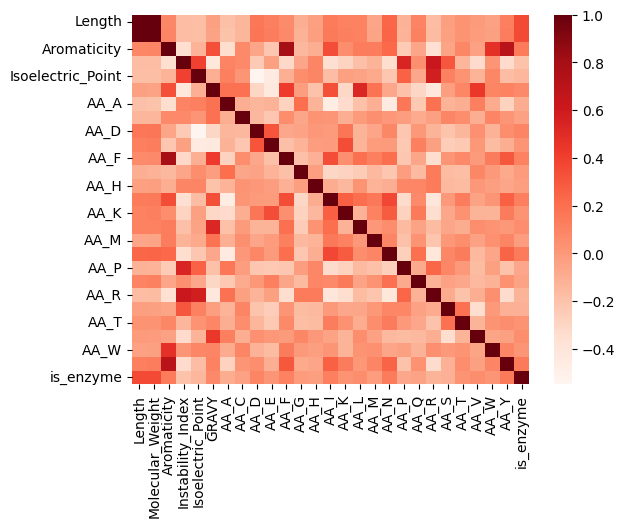

<Figure size 1800x1600 with 0 Axes>

In [12]:
#Heatmap
num_cols = data.select_dtypes(include=np.number)
corr_matrix = num_cols.corr()
sns.heatmap(corr_matrix,cmap='Reds')
plt.figure(figsize=(18,16))
plt.show()

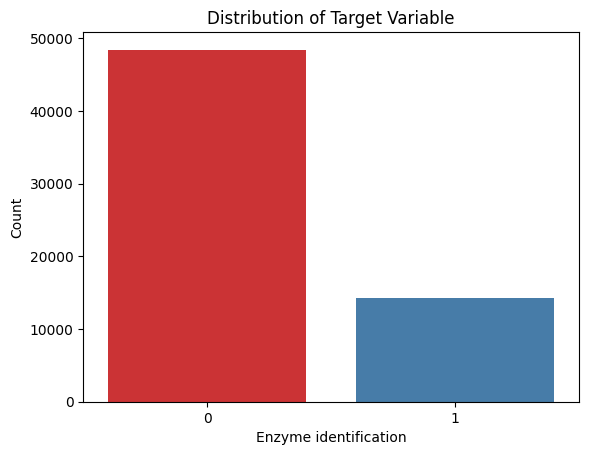

In [13]:
# Visualizing the distribution of the target variable

sns.countplot(x='is_enzyme', data=data, palette='Set1')
plt.title('Distribution of Target Variable')
plt.xlabel('Enzyme identification')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [14]:
#Dropping irrelevant columns

irr_cols = ['protein_id']
data.drop(irr_cols,inplace=True,axis=1)
print(f'Data columns after dropping :\n{data.columns}')

Data columns after dropping :
Index(['Length', 'Molecular_Weight', 'Aromaticity', 'Instability_Index',
       'Isoelectric_Point', 'GRAVY', 'AA_A', 'AA_C', 'AA_D', 'AA_E', 'AA_F',
       'AA_G', 'AA_H', 'AA_I', 'AA_K', 'AA_L', 'AA_M', 'AA_N', 'AA_P', 'AA_Q',
       'AA_R', 'AA_S', 'AA_T', 'AA_V', 'AA_W', 'AA_Y', 'is_enzyme'],
      dtype='object')


In [15]:
# Changing column names for identification

amino_acids = {
    'AA_A': 'Alanine',
    'AA_C': 'Cysteine',
    'AA_D': 'Aspartic Acid',
    'AA_E': 'Glutamic Acid',
    'AA_F': 'Phenylalanine',
    'AA_G': 'Glycine',
    'AA_H': 'Histidine',
    'AA_I': 'Isoleucine',
    'AA_K': 'Lysine',
    'AA_L': 'Leucine',
    'AA_M': 'Methionine',
    'AA_N': 'Asparagine',
    'AA_P': 'Proline',
    'AA_Q': 'Glutamine',
    'AA_R': 'Arginine',
    'AA_S': 'Serine',
    'AA_T': 'Threonine',
    'AA_V': 'Valine',
    'AA_W': 'Tryptophan',
    'AA_Y': 'Tyrosine',
}

# Rename columns using the dictionary
data = data.rename(columns=amino_acids)
print(data.columns)

Index(['Length', 'Molecular_Weight', 'Aromaticity', 'Instability_Index',
       'Isoelectric_Point', 'GRAVY', 'Alanine', 'Cysteine', 'Aspartic Acid',
       'Glutamic Acid', 'Phenylalanine', 'Glycine', 'Histidine', 'Isoleucine',
       'Lysine', 'Leucine', 'Methionine', 'Asparagine', 'Proline', 'Glutamine',
       'Arginine', 'Serine', 'Threonine', 'Valine', 'Tryptophan', 'Tyrosine',
       'is_enzyme'],
      dtype='object')


In [16]:
#Feature-Target separation

X = data.drop(columns=["is_enzyme"])
y = data["is_enzyme"]

In [17]:
#Train-Test-Validation Split

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
#D Train all models with preprocessing

models={
    "RandomForest":RandomForestClassifier(class_weight='balanced', random_state=42),
    "GradientBoost":GradientBoostingClassifier(),
    "XGBoost":XGBClassifier(),
    "LogisticRegression":LogisticRegression(class_weight='balanced', random_state=42),
    "LightGBM":LGBMClassifier(random_state=42,verbosity=-1),
    "AdaBoost":AdaBoostClassifier(),
    "GaussianNaiveBayes":GaussianNB(),
}

results = []

for name, model in models.items():
    print(f"\n>>> Training model: {name}")
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    
    model_step = pipeline.named_steps['model']
    if hasattr(model_step, "predict_proba"):
        y_val_prob = pipeline.predict_proba(X_val)[:, 1]
    elif hasattr(model_step, "decision_function"):
        y_val_prob = pipeline.decision_function(X_val)
    else:
        y_val_prob = y_val_pred


    results.append({
        "Model": name,
        "Accuracy" : accuracy_score(y_val, y_val_pred),
        "F1 Score": f1_score(y_val, y_val_pred),
        "Precision Score": precision_score(y_val, y_val_pred),
        "Recall Score": recall_score(y_val, y_val_pred),
        "ROC_AUC": roc_auc_score(y_val, y_val_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
display(results_df)


>>> Training model: RandomForest

>>> Training model: GradientBoost

>>> Training model: XGBoost

>>> Training model: LogisticRegression

>>> Training model: LightGBM

>>> Training model: AdaBoost

>>> Training model: GaussianNaiveBayes


,Model,Accuracy,F1 Score,Precision Score,Recall Score,ROC_AUC
0,RandomForest,0.892443,0.770000,0.753559,0.787175,0.939145
1,XGBoost,0.819853,0.664024,0.578984,0.778346,0.892691
2,LightGBM,0.789988,0.620438,0.528815,0.750465,0.869044
3,GradientBoost,0.746944,0.576711,0.467031,0.753717,0.834936
4,AdaBoost,0.718142,0.543860,0.431731,0.734665,0.804613
5,GaussianNaiveBayes,0.672548,0.523876,0.392452,0.787639,0.780173
6,LogisticRegression,0.686045,0.507667,0.395790,0.707714,0.769870


In [19]:
# Hyperparameter tuning for top models

top_models = []

param_distributions = {
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [10, 20, -1],
        'num_leaves': [31, 63, 127],
        'min_data_in_leaf': [20, 50, 100]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}


top_models = {}
for name in ["RandomForest", "XGBoost", "LightGBM"]:
    print(f"\nTuning {name}...")
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', models[name])
    ])
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions={f'model__{k}': v for k, v in param_distributions[name].items()},
        n_iter=10,
        cv=3,
        n_jobs=-1,
        scoring='f1',
        random_state=42
    )
    random_search.fit(X_train, y_train)
    top_models[name] = random_search.best_estimator_


Tuning RandomForest...

Tuning XGBoost...

Tuning LightGBM...


In [20]:
# Evaluate tuned models

tuned_results = []
for name, model in top_models.items():
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    tuned_results.append({
        "Model": name,
        "Accuracy" : accuracy_score(y_val, y_val_pred),
        "F1 Score": f1_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "ROC_AUC": roc_auc_score(y_val, y_val_prob)
    })

top_models_df = pd.DataFrame(tuned_results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
display(top_models_df)

,Model,Accuracy,F1 Score,Precision,Recall,ROC_AUC
0,XGBoost,0.890530,0.765376,0.750670,0.780669,0.934212
1,LightGBM,0.881284,0.752712,0.718816,0.789963,0.931012
2,RandomForest,0.877883,0.745063,0.712951,0.780204,0.928529


In [21]:
# Voting Classifier

# Resample training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_val_scaled = scaler.transform(X_val)

# Define and train VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[(name, model) for name, model in top_models.items()],
    voting='soft'
)
voting_classifier.fit(X_res_scaled, y_res)

# Predict and evaluate
y_val_pred_vt = voting_classifier.predict(X_val_scaled)
y_val_prob_vt = voting_classifier.predict_proba(X_val_scaled)[:, 1]

voting_results = {
    "Model": "VotingClassifier",
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "F1 Score": f1_score(y_val, y_val_pred_vt),
    "Precision": precision_score(y_val, y_val_pred_vt),
    "Recall": recall_score(y_val, y_val_pred_vt),
    "ROC_AUC": roc_auc_score(y_val, y_val_prob_vt)
}

top_models_df = pd.concat([top_models_df, pd.DataFrame([voting_results])], ignore_index=True)
top_models_df = top_models_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
top_models["VotingClassifier"] = voting_classifier
display(top_models_df)

,Model,Accuracy,F1 Score,Precision,Recall,ROC_AUC
0,VotingClassifier,0.881284,0.767389,0.746485,0.789498,0.936256
1,XGBoost,0.890530,0.765376,0.750670,0.780669,0.934212
2,LightGBM,0.881284,0.752712,0.718816,0.789963,0.931012
3,RandomForest,0.877883,0.745063,0.712951,0.780204,0.928529


In [22]:
# Final evaluation on test set

final_results = []

X_full = pd.concat([X_train, X_val], axis=0).reset_index(drop=True)
y_full = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

best_model_name = top_models_df.loc[0, 'Model']
print(f"\nBest tuned model: {best_model_name}")

if best_model_name == "VotingClassifier":
    best_model = top_models["VotingClassifier"]
    X_test_scaled = scaler.transform(X_test)
    y_test_pred = best_model.predict(X_test_scaled)
    y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    best_model = top_models[best_model_name]
    best_pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', best_model.named_steps['model'] if isinstance(best_model, Pipeline) else best_model)
    ])
    best_pipeline.fit(X_full, y_full)
    y_test_pred = best_pipeline.predict(X_test)
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]


final_results.append({
        "Model": best_model_name,
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "ROC_AUC": roc_auc_score(y_test,y_test_proba )
})

final_results_df = pd.DataFrame(final_results)
display(final_results_df)


Best tuned model: VotingClassifier


,Model,Accuracy,F1 Score,Precision,Recall,ROC_AUC
0,VotingClassifier,0.893305,0.767593,0.757423,0.778038,0.939821


Aggregated feature importance (average across tree-based models):


,importance_sum,importance_avg
Cysteine,1734.066591,578.022197
Leucine,1614.076278,538.025426
Asparagine,1610.054558,536.684853
Molecular_Weight,1600.286963,533.428988
Histidine,1581.053218,527.017739
Tryptophan,1557.058602,519.019534
Glutamine,1530.057444,510.019148
Serine,1520.060974,506.686991
Valine,1501.050930,500.350310
Proline,1499.085400,499.695133


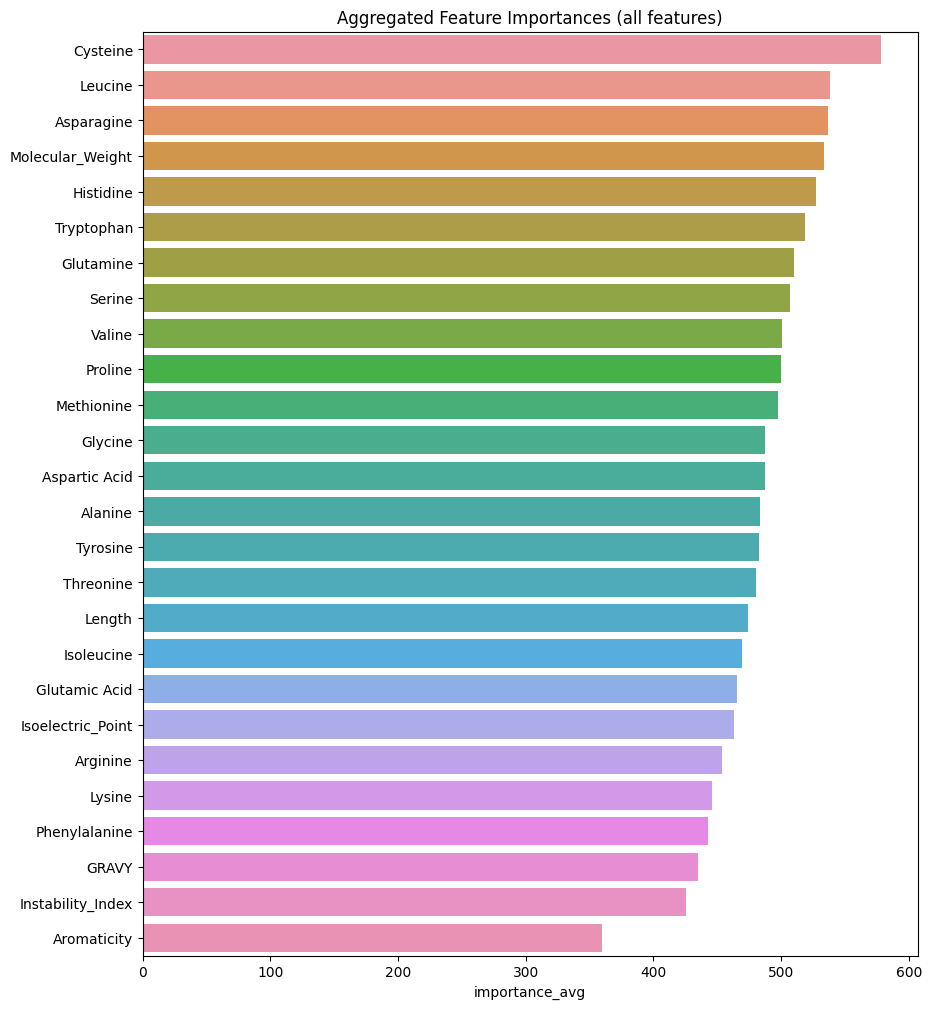

In [23]:
# Aggregated feature importance from tree-based models in VotingClassifier

feat_importances_df = pd.DataFrame(0, index=X.columns, columns=['importance_sum'])
tree_models_count = 0

# Loop through each fitted estimator in VotingClassifier
for i, estimator in enumerate(voting_classifier.estimators_):
    name = voting_classifier.estimators[i][0]  # get model name

    # Extract the model from pipeline if it is a Pipeline
    if isinstance(estimator, Pipeline):
        model = estimator.named_steps['model']
    else:
        model = estimator

    # Check if the model has feature_importances_
    if hasattr(model, 'feature_importances_'):
        tree_models_count += 1
        feat_importances_df['importance_sum'] += model.feature_importances_

if tree_models_count > 0:
    feat_importances_df['importance_avg'] = feat_importances_df['importance_sum'] / tree_models_count
    feat_importances_df = feat_importances_df.sort_values(by='importance_avg', ascending=False)

    print("Aggregated feature importance (average across tree-based models):")
    display(feat_importances_df.head(15))  # show top 15 features
    
    plt.figure(figsize=(10,12))
    sns.barplot(x=feat_importances_df['importance_avg'], y=feat_importances_df.index)
    plt.title("Aggregated Feature Importances (all features)")
    plt.show()

else:
    print("No tree-based models with feature_importances_ found in VotingClassifier.")


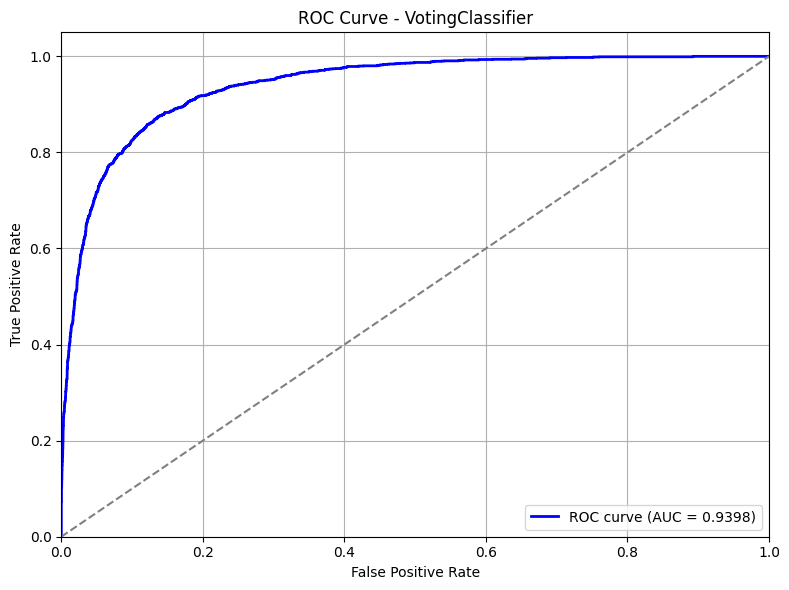

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fpr, tpr, _ =  roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - VotingClassifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_votingclassifier.png", dpi=300)
plt.show()


Top 15 Features by Permutation Importance:


Proline              0.051122
Glycine              0.048744
Asparagine           0.037790
Serine               0.036894
Isoelectric_Point    0.035103
Length               0.031078
Cysteine             0.030555
Leucine              0.028487
Isoleucine           0.027361
Alanine              0.025197
Methionine           0.024252
Aspartic Acid        0.023064
Glutamine            0.022020
Histidine            0.021949
Molecular_Weight     0.020681
dtype: float64

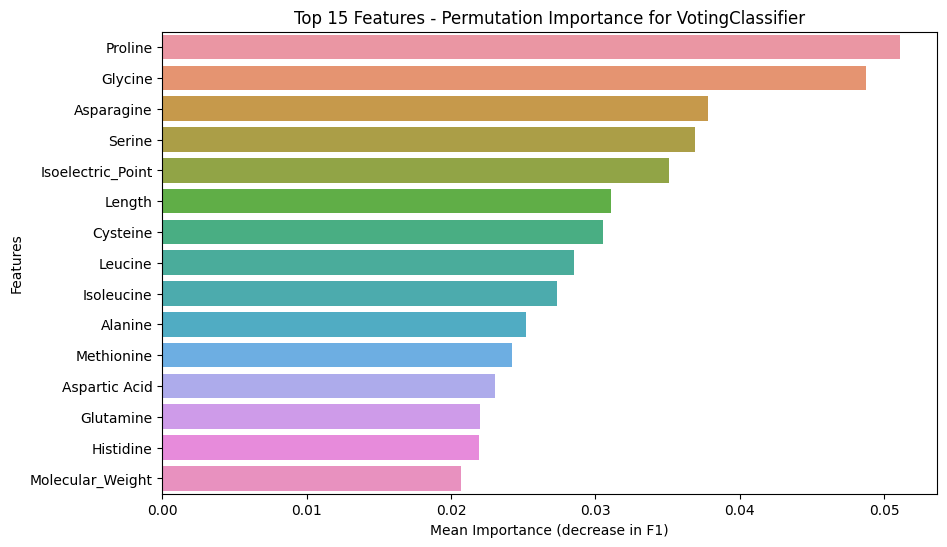

In [25]:
# Permutation Feature Importance for VotingClassifier

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure X_val_scaled is a DataFrame with column names
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns)

# Compute permutation importance
perm_importance = permutation_importance(
    voting_classifier, 
    X_val_scaled_df, 
    y_val, 
    n_repeats=10, 
    random_state=42, 
    scoring='f1'
)

# Convert to Series for easy plotting
feat_imp = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# Display top 15 features
print("Top 15 Features by Permutation Importance:")
display(feat_imp.head(15))

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Features - Permutation Importance for VotingClassifier")
plt.xlabel("Mean Importance (decrease in F1)")
plt.ylabel("Features")
plt.show()

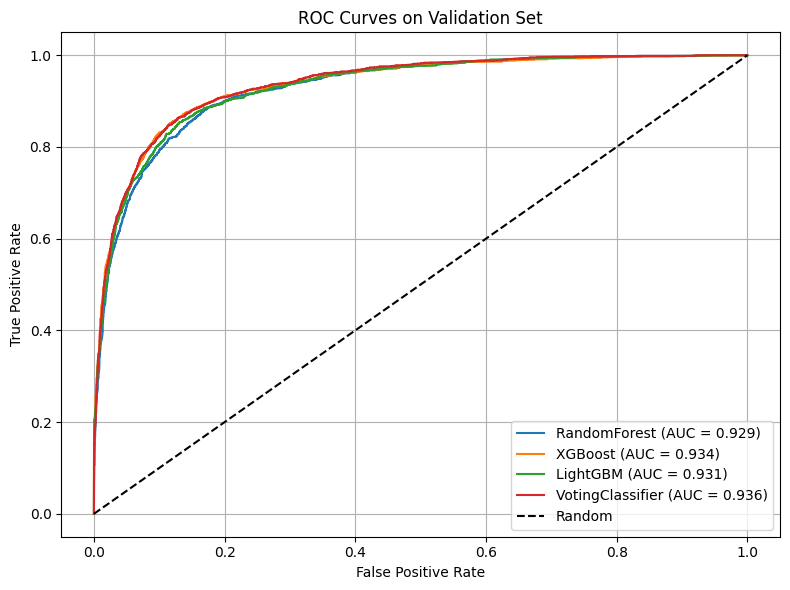

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# List of models to plot (all top_models + VotingClassifier)
all_models = top_models.copy()
all_models["VotingClassifier"] = voting_classifier

for name, model in all_models.items():
    # Get validation probabilities
    if name == "VotingClassifier":
        y_prob = model.predict_proba(X_val_scaled)[:, 1]  # use scaled validation data
    else:
        y_prob = model.predict_proba(X_val)[:, 1]  # top_models pipelines already include scaling inside
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc_score = roc_auc_score(y_val, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves on Validation Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curve.png',dpi=300)
plt.show()
